# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array
for x in np.arange(len(cities)):

    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    # Print end of data retrieval process message
print("End")


# Drop the rows that have been added with no data or partial data
cleanWeather = weatherDF.dropna()

        

Beginning Data Retrieval
-------------------------------
Processing record 0 | miastko
Processing record 1 | russell
Processing record 2 | khatanga
Processing record 3 | barrow
Processing record 4 | rikitea
Processing record 5 | broome
Processing record 6 | avarua
Processing record 7 | provideniya
Processing record 8 | mar del plata
Processing record 9 | vaini
Processing record 10 | belushya guba
City not found. Skipping...
Processing record 11 | ituni
City not found. Skipping...
Processing record 12 | tkvarcheli
City not found. Skipping...
Processing record 13 | samusu
City not found. Skipping...
Processing record 14 | jamestown
Processing record 15 | atuona
Processing record 16 | ushuaia
Processing record 17 | tabarqah
City not found. Skipping...
Processing record 18 | hami
Processing record 19 | mataura
Processing record 20 | kovdor
Processing record 21 | okhotsk
Processing record 22 | weligama
Processing record 23 | petropavlovka
Processing record 24 | labrea
City not found. Skippi

Processing record 222 | butaritari
Processing record 223 | high level
Processing record 224 | camabatela
Processing record 225 | san patricio
Processing record 226 | hamilton
Processing record 227 | merauke
Processing record 228 | kawalu
Processing record 229 | lavrentiya
Processing record 230 | tubmanburg
Processing record 231 | gottmadingen
Processing record 232 | kahului
Processing record 233 | acarau
City not found. Skipping...
Processing record 234 | baglung
Processing record 235 | fortuna
Processing record 236 | iqaluit
Processing record 237 | ketchikan
Processing record 238 | cayenne
Processing record 239 | ortona
Processing record 240 | mount gambier
Processing record 241 | san policarpo
Processing record 242 | culebra
Processing record 243 | ukiah
Processing record 244 | anzio
Processing record 245 | karratha
Processing record 246 | kualakapuas
Processing record 247 | kitimat
Processing record 248 | klaksvik
Processing record 249 | havre-saint-pierre
Processing record 250 | ve

Processing record 454 | cartagena
Processing record 455 | pudozh
Processing record 456 | port hardy
Processing record 457 | salsk
Processing record 458 | tuatapere
Processing record 459 | kurilsk
Processing record 460 | ngukurr
City not found. Skipping...
Processing record 461 | hofn
Processing record 462 | raga
City not found. Skipping...
Processing record 463 | naliya
Processing record 464 | usinsk
Processing record 465 | guerrero negro
Processing record 466 | ocos
Processing record 467 | kouango
Processing record 468 | marzuq
Processing record 469 | kloulklubed
Processing record 470 | rio casca
Processing record 471 | birin
Processing record 472 | coahuayana
Processing record 473 | portsmouth
Processing record 474 | shelopugino
Processing record 475 | moranbah
Processing record 476 | ponta do sol
Processing record 477 | sitka
Processing record 478 | saulkrasti
Processing record 479 | juneau
Processing record 480 | viligili
City not found. Skipping...
Processing record 481 | eenhana


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Output to data file previously defined
cleanWeather.to_csv(output_data_file)



#Display counts of each column
cleanWeather.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [27]:
# Display the final dataframe
cleanWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Miastko,48,PL,1544938193,91,54,16.98,25.26,8.41
1,Russell,0,AR,1544938194,54,-33.01,-68.8,51.04,4.72
2,Khatanga,44,RU,1544938194,75,71.98,102.47,-7.24,7.74
3,Barrow,0,AR,1544938194,40,-38.31,-60.23,70.71,18.37
4,Rikitea,24,PF,1544938195,100,-23.12,-134.97,78.85,6.96


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

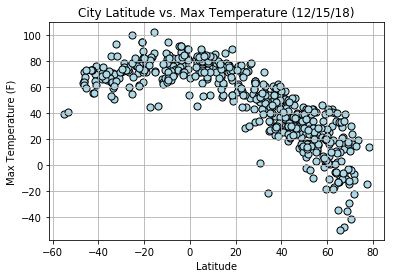

In [36]:
#Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Max Temp"], color="lightblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title(f"City Latitude vs. Max Temperature (12/15/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVtemp.png")

#### Latitude vs. Humidity Plot

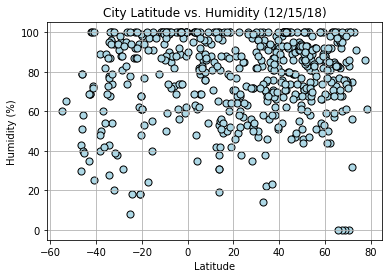

In [37]:
# Plot a scatter plot of latitude vs humidity with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Humidity"],color="lightblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Humidity (12/15/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVhum.png")

#### Latitude vs. Cloudiness Plot

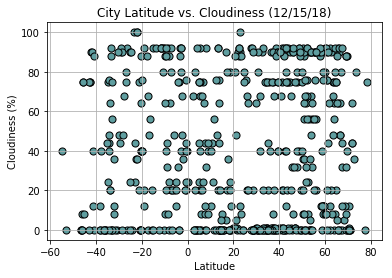

In [38]:
# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Cloudiness"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Cloudiness (12/15/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVcloud.png")

#### Latitude vs. Wind Speed Plot

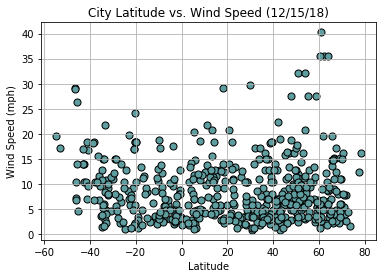

In [40]:
# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Wind Speed"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Wind Speed (12/15/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVwind.png")

# Three Observable Trends
1. The temperature is decreasing as the city latitude is increasing toward the north pole
2. The Wind Speed seems to stay low and humidity tends to be high regardless of the city latitude
3. The cloudiness seems to spread out evenly regardless of latitude.